<a href="https://colab.research.google.com/github/alifars/torch101/blob/main/linear_regression_notorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from matplotlib import pyplot as plt


y = ax + b
a= 2
b = 1

In [2]:
# 100 random point between 0 and 1 for x
np.random.seed(42)
x = np.random.rand(100)
noise = np.random.rand(100)

In [3]:
x.shape

(100,)

In [4]:
y = 2*x+1 + noise

Text(0, 0.5, 'y')

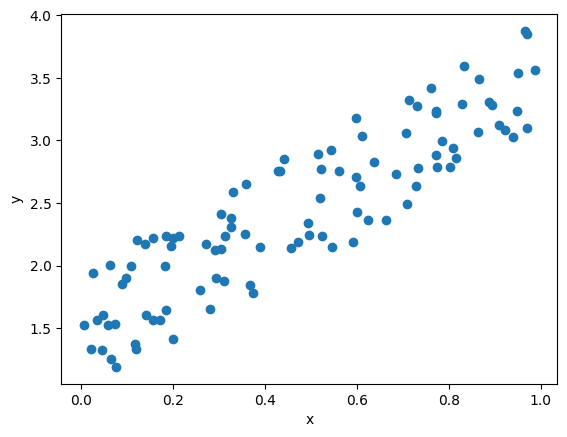

In [5]:
plt.scatter(x,y)
plt.xlabel("x")
plt.ylabel("y")

In [6]:
# split to train and val
np.random.seed(42)
idx = np.arange(100)
np.random.shuffle(idx)
train_idxs, test_idxs = idx[:80], idx[80:]
x_train, y_train = x[train_idxs] , y[train_idxs]
x_test, y_test = x[test_idxs] , y[test_idxs]

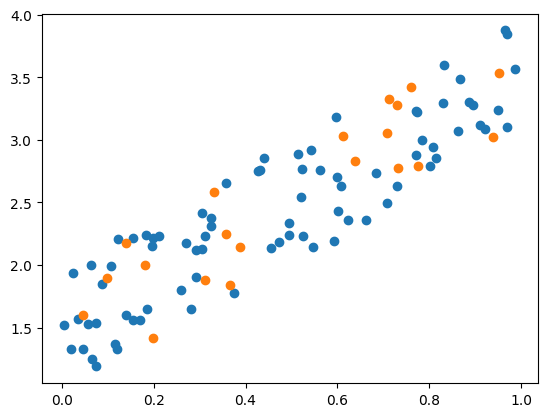

In [7]:
plt.scatter(x_train,y_train)
plt.scatter(x_test, y_test)

# **Back propogation**

1.   going forward: using x_train and initial parameters, calculate y_hat
2.   compute losss having y_hat and y_train
3.   calculate partial derivative of loss respective to each parameter
4.   update parameters having learning rate and gradients a = a- dl/da


loss = MSE (mean squared error):

$loss=\sum_{i=1}^{100} (y-\hat{y})^2$




![gradient.webp](attachment:image.png)

In [8]:
#
epochs = 300
N = 80
# initialize
a = np.random.randn(1)
b = np.random.rand(1)
print(a, b)
lr = 1e-6


for e in range(epochs):
    y_hat = a * x_train + b
    error = y_hat - y_train
    loss = (error**2).mean()

    a_grad = -2 * error.mean()
    b_grad = -2 * (x_train * error).mean()

    # Updates parameters using gradients and the learning rate
    a = a - lr * a_grad
    b = b - lr * b_grad
    #print(loss)

print(a,b)






[0.63630511] [0.79017554]
[0.63550859] [0.78973609]


# Convert it to Pytorch

- convert vectors to tensors
- use autograd to compute gradients


In [9]:
import torch

device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [10]:

x_train_tensor = torch.from_numpy(x_train).to(device)
y_train_tensor = torch.from_numpy(y_train).to(device)

In [11]:
type(x_train_tensor)

torch.Tensor

# Use torch loss to compute gradients

In [18]:
#
epochs = 300
N = 80
# initialize
#a = np.random.randn(1)
#b = np.random.rand(1)
# create tensors that require gradients
a = torch.randn(1, requires_grad= True, dtype= torch.float)
b = torch.randn(1, requires_grad = True, dtype= torch.float)
print(a,b)
lr = 1e-6
for e in range(epochs):
    # y_hat = a * x_train + b
    # error = y_hat - y_train
    # loss = (error**2).mean()

    y_hat_tensor = a*x_train_tensor + b
    error = y_hat_tensor - y_train_tensor
    loss = (error**2).mean()



#     a_grad = -2 * error.mean()
#     b_grad = -2 * (x_train * error).mean()
    # instead of computing gras, we use loss.backward
    loss.backward()


#     # Updates parameters using gradients and the learning rate
#     a = a - lr * a_grad
#     b = b - lr * b_grad

    with torch.no_grad():
      a -= lr* a_grad
      b -= lr * b_grad

    a.grad.zero_()
    b.grad.zero_()

print(a,b)






tensor([-0.2233], requires_grad=True) tensor([-0.9502], requires_grad=True)
tensor([-0.2241], requires_grad=True) tensor([-0.9506], requires_grad=True)


# Use torch.optim to update parameters

In [19]:
#
epochs = 300
N = 80
# initialize
#a = np.random.randn(1)
#b = np.random.rand(1)
# create tensors that require gradients
a = torch.randn(1, requires_grad= True, dtype= torch.float)
b = torch.randn(1, requires_grad = True, dtype= torch.float)
print(a,b)
lr = 1e-6
optimizer = torch.optim.SGD([a,b], lr)
for e in range(epochs):
    # y_hat = a * x_train + b
    # error = y_hat - y_train
    # loss = (error**2).mean()

    y_hat_tensor = a*x_train_tensor + b
    error = y_hat_tensor - y_train_tensor
    loss = (error**2).mean()



#     a_grad = -2 * error.mean()
#     b_grad = -2 * (x_train * error).mean()
    # instead of computing gras, we use loss.backward


#     # Updates parameters using gradients and the learning rate
#     a = a - lr * a_grad
#     b = b - lr * b_grad

    # with torch.no_grad():
    #   a -= lr* a_grad
    #   b -= lr * b_grad

    # a.grad.zero_()
    # b.grad.zero_()
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()


print(a,b)






tensor([-0.1048], requires_grad=True) tensor([-0.1058], requires_grad=True)
tensor([-0.1040], requires_grad=True) tensor([-0.1042], requires_grad=True)


# Use nn.loss to calculate loss

In [21]:

epochs = 300
N = 80
# initialize
#a = np.random.randn(1)
#b = np.random.rand(1)
# create tensors that require gradients
a = torch.randn(1, requires_grad= True, dtype= torch.float)
b = torch.randn(1, requires_grad = True, dtype= torch.float)
print(a,b)
lr = 1e-6
optimizer = torch.optim.SGD([a,b], lr)
loss_fn = torch.nn.MSELoss()
for e in range(epochs):
    # y_hat = a * x_train + b
    # error = y_hat - y_train
    # loss = (error**2).mean()

    y_hat_tensor = a*x_train_tensor + b
    error = y_hat_tensor - y_train_tensor
    loss = loss_fn(y_hat_tensor, y_train_tensor)





#     a_grad = -2 * error.mean()
#     b_grad = -2 * (x_train * error).mean()
    # instead of computing gras, we use loss.backward


#     # Updates parameters using gradients and the learning rate
#     a = a - lr * a_grad
#     b = b - lr * b_grad

    # with torch.no_grad():
    #   a -= lr* a_grad
    #   b -= lr * b_grad

    # a.grad.zero_()
    # b.grad.zero_()
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()


print(a,b)






tensor([1.1414], requires_grad=True) tensor([-0.1734], requires_grad=True)
tensor([1.1420], requires_grad=True) tensor([-0.1722], requires_grad=True)
